In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
dts = [0.01, 0.02, 0.04, 0.05, 0.1, 0.2, 0.25, 0.5, 1.0]
data = {}

for dt in dts:
    data[dt] = pd.read_csv(f'decay_data/{str(dt)}.dat')

In [11]:
# Analytical solution
ts = np.linspace(0, 6, 100)
ns = 100 * np.exp(- ts / 1)

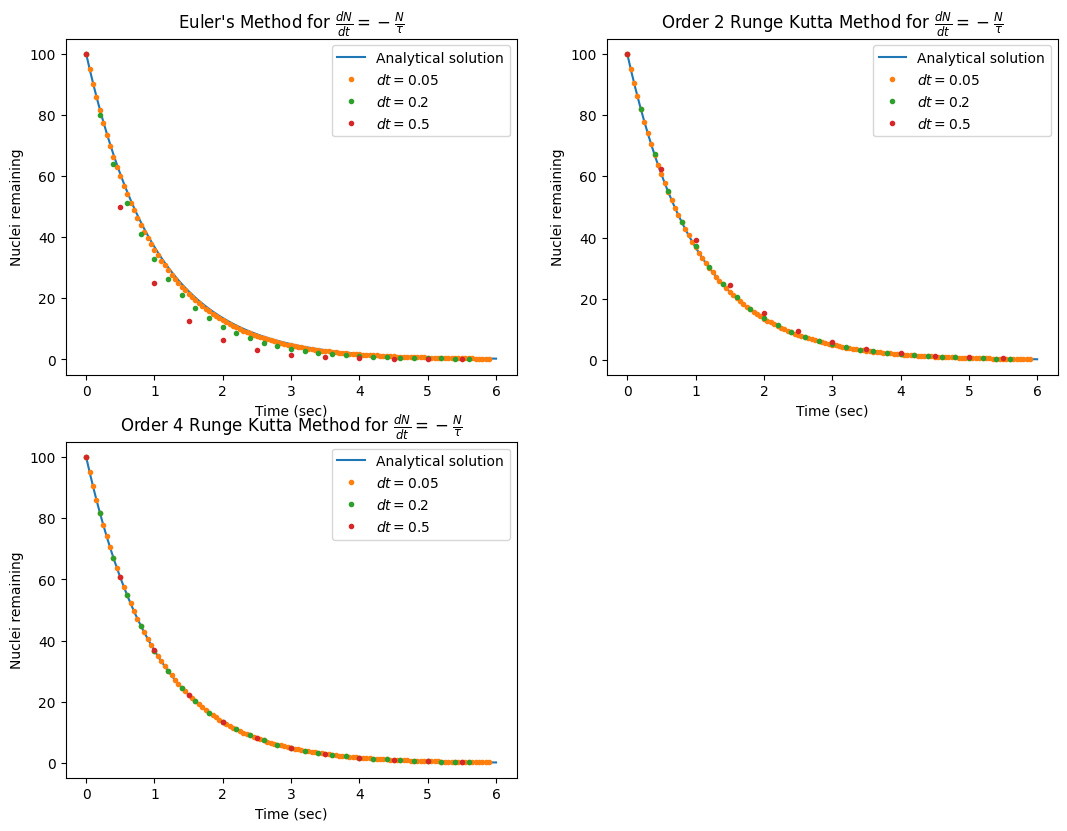

In [12]:
plt.figure(figsize=(6.4*2, 4.8*2))

plt.subplot(221) # Euler

plt.plot(ts, ns, label = 'Analytical solution')
plt.plot(data[0.05]["t"], data[0.05]["euler"], ls='none', marker = '.', label = '$dt = 0.05$')
plt.plot(data[0.2]["t"], data[0.2]["euler"], ls='none', marker = '.', label = '$dt = 0.2$')
plt.plot(data[0.5]["t"], data[0.5]["euler"], ls='none', marker = '.', label = '$dt = 0.5$')

plt.xlabel('Time (sec)')
plt.ylabel('Nuclei remaining')
plt.legend()
plt.title('Euler\'s Method for $\\frac{dN}{dt} = - \\frac{N}{\\tau}$')


plt.subplot(222) # RK 2

plt.plot(ts, ns, label = 'Analytical solution')
plt.plot(data[0.05]["t"], data[0.05]["rk2"], ls='none', marker = '.', label = '$dt = 0.05$')
plt.plot(data[0.2]["t"], data[0.2]["rk2"], ls='none', marker = '.', label = '$dt = 0.2$')
plt.plot(data[0.5]["t"], data[0.5]["rk2"], ls='none', marker = '.', label = '$dt = 0.5$')

plt.xlabel('Time (sec)')
plt.ylabel('Nuclei remaining')
plt.legend()
plt.title('Order 2 Runge Kutta Method for $\\frac{dN}{dt} = - \\frac{N}{\\tau}$')


plt.subplot(223) # RK 4

plt.plot(ts, ns, label = 'Analytical solution')
plt.plot(data[0.05]["t"], data[0.05]["rk4"], ls='none', marker = '.', label = '$dt = 0.05$')
plt.plot(data[0.2]["t"], data[0.2]["rk4"], ls='none', marker = '.', label = '$dt = 0.2$')
plt.plot(data[0.5]["t"], data[0.5]["rk4"], ls='none', marker = '.', label = '$dt = 0.5$')

plt.xlabel('Time (sec)')
plt.ylabel('Nuclei remaining')
plt.legend()
plt.title('Order 4 Runge Kutta Method for $\\frac{dN}{dt} = - \\frac{N}{\\tau}$')

plt.savefig('decay_figure.png')
plt.show()

Above, numerical solutions to the problem of single species nuclear decay are plotted. The Euler method, Order 2 and Order 4 Runge Kutta methods are used with three different time steps.

For the Euler method, it is apparent that using the largest time step causes significant error from the analytical solution. Using smaller timesteps reduces this error. Compared to the Euler method, the Order 2 and Order 4 Runge Kutta methods perform better. The precise behavior of the error of these methods is investigated in the second plot in this notebook.

In [13]:
N1error_euler = {} # will hold errors in values of N after 1 timestep for each timestep
N1error_rk2 = {}
N1error_rk4 = {}

for dt in dts:
    true_val = 100 * np.exp(- dt / 1)
    N1error_euler[dt] = np.abs(data[dt]["euler"][1] - true_val)  # error of N after 1 timestep
    N1error_rk2[dt] = np.abs(data[dt]["rk2"][1] - true_val)
    N1error_rk4[dt] = np.abs(data[dt]["rk4"][1] - true_val)

N5error_euler = {} # will hold errors in values of N after 5 seconds for each timestep
N5error_rk2 = {}
N5error_rk4 = {}

for dt in dts:
    true_val = 100 * np.exp(- 5 / 1)
    t5_data = data[dt][data[dt]["t"] == 5.0]
    N5error_euler[dt] = np.abs(t5_data["euler"].iloc[0] - true_val)  # error in N at t=5
    N5error_rk2[dt] = np.abs(t5_data["rk2"].iloc[0] - true_val)
    N5error_rk4[dt] = np.abs(t5_data["rk4"].iloc[0] - true_val)

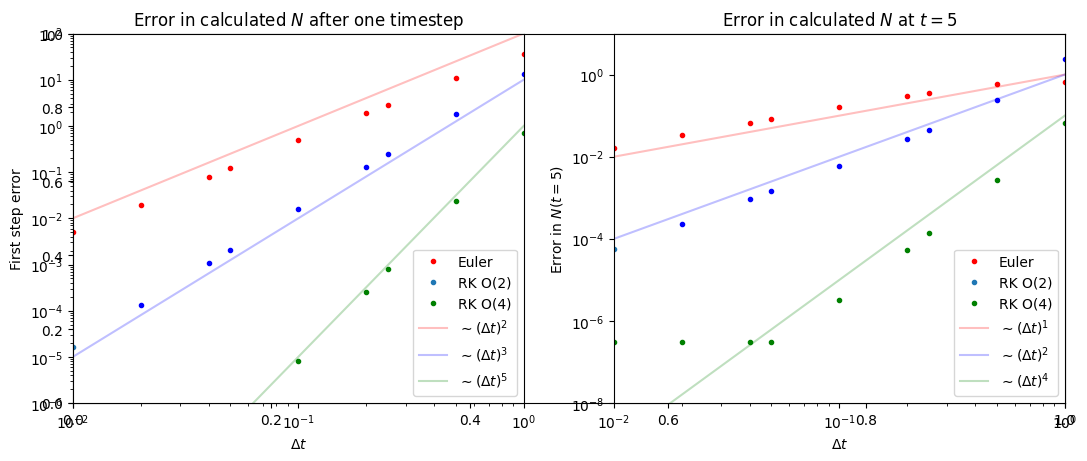

In [14]:
plt.subplots(figsize=(6.4*2, 4.8))

### SUBPLOT 1: Error in calculated $N$ after one timestep ###
plt.subplot(121)

plt.loglog(dts[0], N1error_euler[dts[0]], 'r.', label='Euler')
for dt in dts[1:]:
    plt.loglog(dt, N1error_euler[dt], 'r.')
    
plt.loglog(dts[0], N1error_rk2[dts[0]], '.', label='RK O(2)')
for dt in dts[1:]:
    plt.loglog(dt, N1error_rk2[dt], 'b.')
    
plt.loglog(dts[0], N1error_rk4[dts[0]], 'g.', label='RK O(4)')
for dt in dts[1:]:
    plt.loglog(dt, N1error_rk4[dt], 'g.')
    

ls = np.logspace(-2, 0, 20)
order2 = 100 * np.power(ls, 2)
order3 = 10 * np.power(ls, 3)
order5 = np.power(ls, 5)

plt.loglog(ls, order2, color='r', alpha=0.25, label=r'$\sim (\Delta t)^2$')
plt.loglog(ls, order3, color='b', alpha=0.25, label=r'$\sim (\Delta t)^3$')
plt.loglog(ls, order5, color='g', alpha=0.25, label=r'$\sim (\Delta t)^5$')


plt.xlim(.01, 1)
plt.ylim(1e-6, 100)
plt.xlabel(r"${\Delta}t$")
plt.ylabel("First step error")
plt.title(r"Error in calculated $N$ after one timestep")
plt.legend()

### SUBPLOT 2: Error in calculated $N$ at $t=5$ ###
plt.subplot(122)

plt.loglog(dts[0], N5error_euler[dts[0]], 'r.', label='Euler')
for dt in dts[1:]:
    plt.loglog(dt, N5error_euler[dt], 'r.')
    
plt.loglog(dts[0], N5error_rk2[dts[0]], '.', label='RK O(2)')
for dt in dts[1:]:
    plt.loglog(dt, N5error_rk2[dt], 'b.')
    
plt.loglog(dts[0], N5error_rk4[dts[0]], 'g.', label='RK O(4)')
for dt in dts[1:]:
    plt.loglog(dt, N5error_rk4[dt], 'g.')
    
    
ls = np.logspace(-2, 0, 20)
order1 = np.power(ls, 1)
order2 = np.power(ls, 2)
order4 = 0.1 * np.power(ls, 4)

plt.loglog(ls, order1, color='r', alpha=0.25, label=r'$\sim (\Delta t)^1$')
plt.loglog(ls, order2, color='b', alpha=0.25, label=r'$\sim (\Delta t)^2$')
plt.loglog(ls, order4, color='g', alpha=0.25, label=r'$\sim (\Delta t)^4$')

plt.xlim(.01, 1)
plt.ylim(1e-8, 10)
plt.xlabel(r"${\Delta}t$")
plt.ylabel("Error in $N(t=5)$")
plt.title(r"Error in calculated $N$ at $t=5$")
plt.legend()

plt.savefig('decay_error_figure.png')
plt.show()

First subplot: This plot shows how the error in calculated $N$ after a single timestep of $\Delta t$ scales with $\Delta t$ for each of the methods used (Euler, Order 2 and Order 4 Runge Kutta). As shown, on the log-log plot the error for the Euler method forms a line with slope 2, indicating that the first-step error for Euler's method is $O(\Delta t ^2)$. This is consistent with analytical findings that the Local Truncation Error (LTE) for Euler's method is $O(\Delta t ^2)$. Similar analysis for the Order 2 and Order 4 Runge Kutta methods shows that the first-step errors are $O(\Delta t ^3)$ and $O(\Delta t ^5)$, as expected from analytical results on the LTE for these methods.

Second subplot: Here, we plot how the error in calculated $N$ after a fixed time (specifically, $t=5$) scales with $\Delta t$. Using a similar analysis as in the previous plot, we find that the fixed-time errors for Euler's methods, Order 2 Runge Kutta, and Order 4 Runge Kutta are $O(\Delta t ^1)$, $O(\Delta t ^2)$, and $O(\Delta t ^4)$, respectively. This is consitent with analytical findings about the Global Truncation Error (GTE) for these methods. Note that for these methods, if the LTE is $O(\Delta t ^n)$, the GTE is $O(\Delta t ^{n-1})$.